In [4]:
import os

# Set your dataset directory path (Change this to your actual folder path)
dataset_path = r"C:\Users\ANN MARIYA\Desktop\S4\Brain Tomar Dataset"  # Example path

# Walk through the dataset directory and list files
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
import numpy as np 
import pandas as pd

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [7]:
# Import libraries
import io  # For handling byte streams
from PIL import Image  # Corrected import for image processing
from tqdm import tqdm  # Progress bar for loops

# Sklearn for data splitting and shuffling
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# OpenCV for image processing
import cv2  

# TensorFlow for deep learning
import tensorflow as tf  


In [12]:
# Folder path
X_train=[]
Y_train=[]
image_size=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('C:/Users/ANN MARIYA/Desktop/S4/Brain Tumor Dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels:
    folderPath = os.path.join('C:/Users/ANN MARIYA/Desktop/S4/Brain Tumor Dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [52]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [53]:
#Train test split

X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [54]:
Y_train_new=[]
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train=tf.keras.utils.to_categorical(Y_train)

Y_test_new=[]
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test=Y_test_new
Y_test=tf.keras.utils.to_categorical(Y_test)

In [ ]:
#Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

c:\Users\ANN MARIYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [58]:
history=model.fit(X_train,Y_train,epochs=25,validation_split=0.1)

Epoch 1/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.2709 - loss: 5.8773 - val_accuracy: 0.4082 - val_loss: 1.3643
Epoch 2/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.3600 - loss: 1.3352 - val_accuracy: 0.4830 - val_loss: 1.2154
Epoch 3/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5217 - loss: 1.1219 - val_accuracy: 0.5510 - val_loss: 0.9829
Epoch 4/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.5911 - loss: 0.9334 - val_accuracy: 0.5476 - val_loss: 1.0192
Epoch 5/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.6309 - loss: 0.8608 - val_accuracy: 0.5170 - val_loss: 0.9932
Epoch 6/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.6812 - loss: 0.7495 - val_accuracy: 0.6224 - val_loss: 0.7846
Epoch 7/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.7329 - loss: 0.6560 - val_accuracy: 0.6803 - val_loss: 0.7189
Epoch 8/25
83/83 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.7685 - loss: 0.5462 - val_accuracy: 0.7483 - val_loss:

In [59]:
# Evaluate the model correctly
loss, accuracy = model.evaluate(X_test, Y_test)  # Pass both inputs and labels
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.9089 - loss: 0.2675
Validation Loss: 0.2507709860801697
Validation Accuracy: 0.9266055226325989


In [60]:
model.save('braintumor.h5')

In [2]:
import matplotlib.pyplot as plt


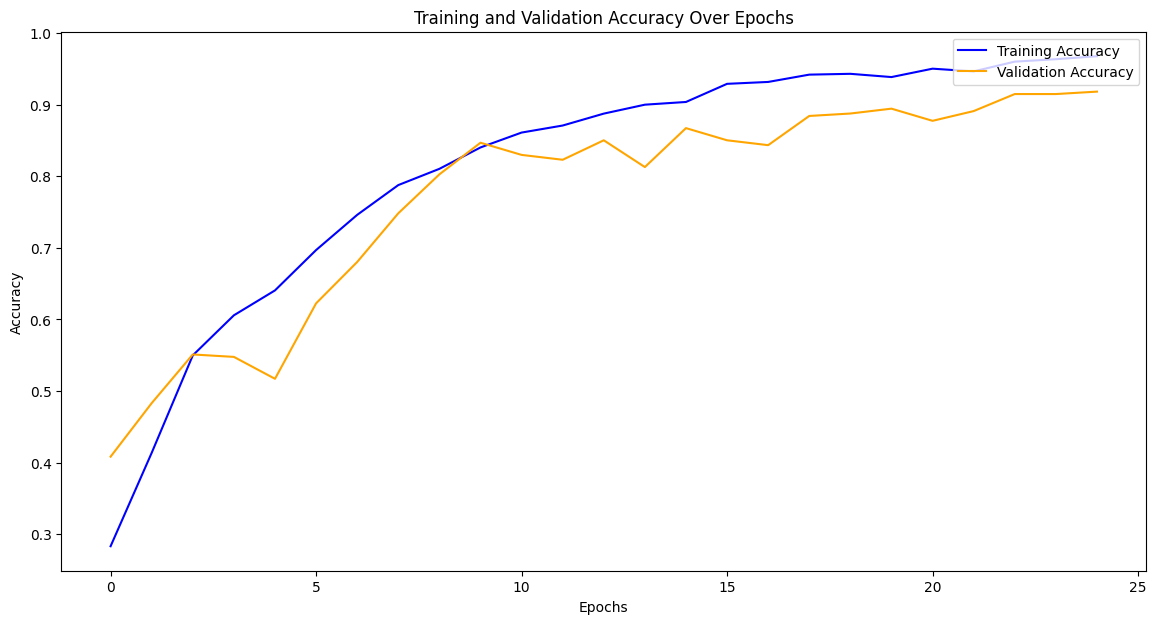

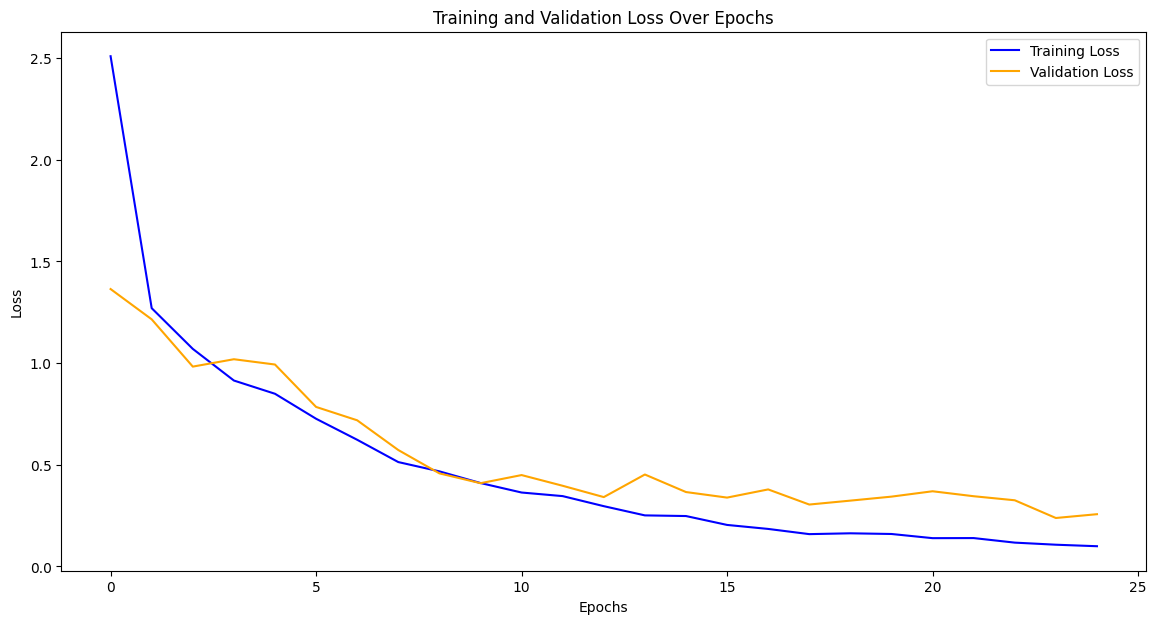

In [62]:


# Accuracy Plot
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'b', label="Training Accuracy")  # Blue for Training
plt.plot(epochs, val_acc, 'orange', label="Validation Accuracy")  # Orange for Validation
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Over Epochs")
plt.legend(loc='upper right')
plt.savefig("accuracy_plot.png", dpi=300)  # Save accuracy plot as PNG
plt.show()

# Loss Plot
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'b', label="Training Loss")  # Blue for Training
plt.plot(epochs, val_loss, 'orange', label="Validation Loss")  # Orange for Validation
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend(loc='upper right')
plt.savefig("loss_plot.png", dpi=300)  # Save loss plot as PNG
plt.show()


In [18]:
#prediction

img=cv2.imread('C:/Users/ANN MARIYA/Desktop/S4/download.jpg')
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array.shape

(150, 150, 3)

In [19]:
img_array=img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

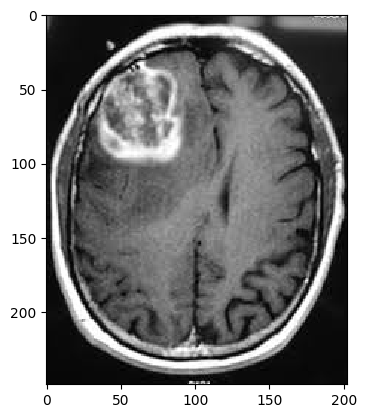

In [20]:
from tensorflow.keras.preprocessing import image
img=image.load_img('C:/Users/ANN MARIYA/Desktop/S4/download.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [21]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("braintumor.h5")
a=model.predict(img_array)
indices=a.argmax()
predicted_class = labels[indices]
print(predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
glioma_tumor


In [23]:
import cv2
import numpy as np
import tensorflow as tf

# Load class labels (ensure order matches your training data)
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

# Load and preprocess the image
img = cv2.imread("C:/Users/ANN MARIYA/Desktop/S4/download.jpg")

# Resize to match model input size
img = cv2.resize(img, (150, 150))

# Normalize pixel values (0-1)
img_array = np.array(img)

# Reshape to add batch dimension
img_array = img_array.reshape(1, 150, 150, 3)

# Load the trained model
model = tf.keras.models.load_model("braintumor.h5")

# Predict
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)  # Get the highest probability class index
predicted_class = labels[predicted_index]  # Get class name

# Print the predicted class
print(f"Predicted Class: {predicted_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Predicted Class: glioma_tumor


In [15]:
print(model.input_shape)


(None, 150, 150, 3)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step


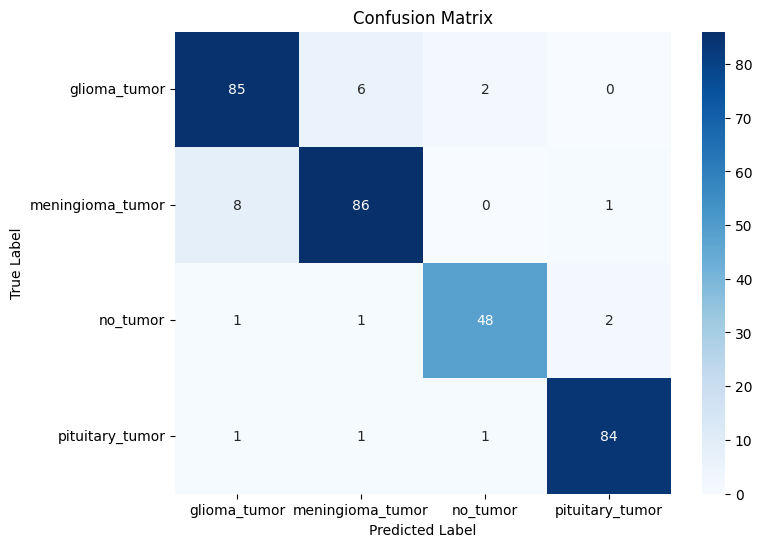

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.89      0.91      0.90        93
meningioma_tumor       0.91      0.91      0.91        95
        no_tumor       0.94      0.92      0.93        52
 pituitary_tumor       0.97      0.97      0.97        87

        accuracy                           0.93       327
       macro avg       0.93      0.93      0.93       327
    weighted avg       0.93      0.93      0.93       327



In [71]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices
y_true_classes = np.argmax(Y_test, axis=1)  # Convert one-hot labels to class indices

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=labels))
